MODULE 1: PUTRESCINE BIOSYNTHESIS
Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme_cytosol, AsADC_enzyme_cytosol, speB_enzyme_cytosol, Car1_enzyme_cytosol, Spe1_enzyme_cytosol, Fms1_enzyme_cytosol
Reactions = [
	First and Second Biochemical Route: Glumatic_Acid → Putrescine
	Glutamic_acid+Arg2_enzyme --> Arginine

	Parallel Reactions: Path 1 - Arginine → Agmatine → Putrescine
	Arginine+AsADC_enzyme --> Agmatine
	Agmatine+speB_enzyme --> Putrescine

	Parallel Reactions: Path 2 - Arginine → Ornithine → Putrescine
	Arginine+Car1_enzyme --> Ornithine
	Ornithine+Spe1_enzyme --> Putrescine

	Third Biochemical Route: Spermine → Spermidine → Putrescine
	Spermine+Fms1_enzyme --> Spermidine
	Spermidine+Fms1_enzyme --> Putrescine
]


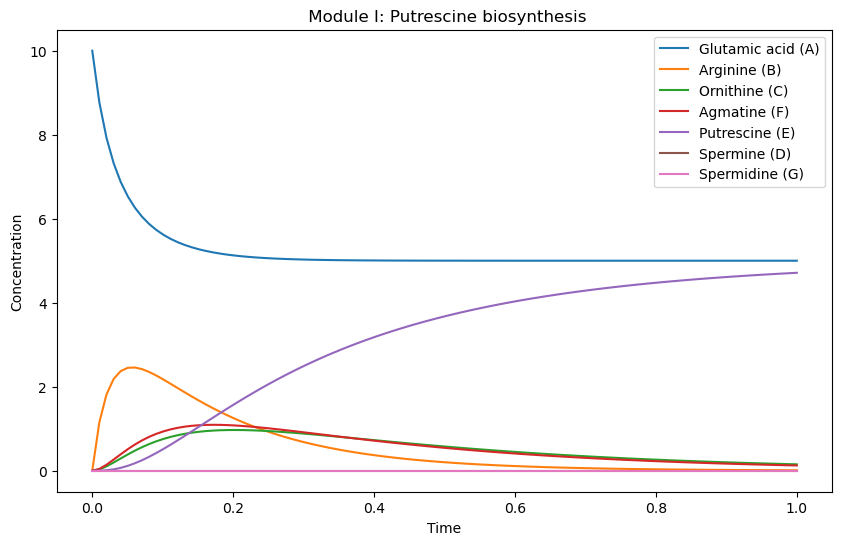

In [70]:
# Module 1: Putrescine Biosynthesis Pathway
# This module describes the biosynthesis of putrescine from glutamic acid through multiple biochemical routes

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
# Define species (cytosolic metabolites)
A = Species("Glutamic_acid", compartment="cytosol")
B = Species("Arginine", compartment="cytosol")
C = Species("Ornithine", compartment="cytosol")
D = Species("Spermine", compartment="cytosol")
E = Species("Putrescine", compartment="cytosol")
F = Species("Agmatine", compartment="cytosol")
G = Species("Spermidine", compartment="cytosol")

# Enzymes (cytosolic)
Arg2  = Species("Arg2_enzyme", compartment="cytosol")
AsADC = Species("AsADC_enzyme", compartment="cytosol")
speB  = Species("speB_enzyme", compartment="cytosol")
Car1  = Species("Car1_enzyme", compartment="cytosol")
Spe1  = Species("Spe1_enzyme", compartment="cytosol")
Fms1  = Species("Fms1_enzyme", compartment="cytosol") 


# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions
R1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)

# Parallel Path 1: Arginine → Agmatine → Putrescine 
R2 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3 = Reaction.from_massaction([F, speB], [E], k_forward=k2)

# Parallel Path 2: Arginine → Ornithine → Putrescine
R4 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)

# 3rd Biochemical Route: Spermine → Spermidine → Putrescine
R6 = Reaction.from_massaction([D, Fms1,], [G], k_forward=k4)
R7 = Reaction.from_massaction([G, Fms1,], [E], k_forward=k4)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1],
    reactions=[R1, R2, R3, R4, R5, R6, R7])

# Custom output with parallel reaction labeling
print ("MODULE 1: PUTRESCINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tFirst and Second Biochemical Route: Glumatic_Acid → Putrescine")
print(f"\t{R1}")  # Glutamic_acid + Arg2_enzyme --> Arginine

#Blank Line
print()

# Parallel Path 1
print("\tParallel Reactions: Path 1 - Arginine → Agmatine → Putrescine")
print(f"\t{R2}")  # Arginine + AsADC_enzyme --> Agmatine
print(f"\t{R3}")  # Agmatine + speB_enzyme --> Putrescine

#Blank Line
print()

# Parallel Path 2
print("\tParallel Reactions: Path 2 - Arginine → Ornithine → Putrescine")
print(f"\t{R4}")  # Arginine + Car1_enzyme --> Ornithine
print(f"\t{R5}")  # Ornithine + Spe1_enzyme --> Putrescine

#Blank Line
print()

# Third Biochemical Route
print("\tThird Biochemical Route: Spermine → Spermidine → Putrescine")
print(f"\t{R6}")  # Spermine + Fms1_enzyme --> Spermidine
print(f"\t{R7}")  # Spermidine + Fms1_enzyme --> Putrescine
print("]")

CRN.write_sbml_file("Module_1.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Correct initial conditions

    x0 = {
        "Glutamic_acid_cytosol": 10,
        "Arginine_cytosol": 0,
        "Ornithine_cytosol": 0,
        "Spermine_cytosol": 0,
        "Putrescine_cytosol": 0,
        "Agmatine_cytosol": 0,
        "Spermidine_cytosol": 0,
        "Arg2_enzyme_cytosol": 5,
        "AsADC_enzyme_cytosol": 5,
        "speB_enzyme_cytosol": 5,
        "Car1_enzyme_cytosol": 5,
        "Spe1_enzyme_cytosol": 5,
        "Fms1_enzyme_cytosol": 5
    }


    timepoints = np.linspace(0, 1, 100)

    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Glutamic_acid_cytosol"], label="Glutamic acid (A)")
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine (B)")
    plt.plot(R['time'], R["Ornithine_cytosol"], label="Ornithine (C)")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine (F)")
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine (D)")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine (G)")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title(" Module I: Putrescine biosynthesis")
    

except ModuleNotFoundError:
    print("Plotting Modules not installed.")




In [ ]:
# Module II:Tropine biosynthesis
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species
A = Species("Putrescine")
B = Species("N_methylputrescine")
C = Species("4_Methylaminobutanal", material_type="intermediate")
D = Species("N_Methyl_Δ1_pyrrolinium")
E = Species("4_1_Methyl_2_pyrrodinyl_3_oxobutanoic_acids", material_type="intermediate")
F = Species("Tropinone")
G = Species("Tropine")

# Enzymes
AbPMT1= Species("AbPMT1_enzyme")
DsPMT1 = Species("DsPMT1_enzyme")
DmMPO1ΔC_PTS1 = Species("DmMPO1ΔC_PTS1_enzyme")
AbPYKS = Species("AbPYKS_enzyme_and_2x_malonyl_CoA_molecules")
AbCYP82M3 = Species("AbCYP82M3_enzyme") 
AtATR1 = Species("AtATR1_enzyme") 
DsTR1 = Species("DsTR1_enzyme") 

# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0
k5 = 1.0

# Step 1: Putrescine → N-Methylputrescine
R1 = Reaction.from_massaction([A, AbPMT1,DsPMT1 ], [B], k_forward=k1)

# Step 2: N-methylputrescine → 4-Methylaminobutanal (This step occurs in the Peroxisome)
R2 = Reaction.from_massaction([B, DmMPO1ΔC_PTS1], [C], k_forward=k2)

# Step 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Reaction occurs spontaneously)
R3 = Reaction.from_massaction([C], [D], k_forward=k3)


# Step 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone
# ^ this reaction (ring formation) occurs in the ER
R4 = Reaction.from_massaction([D, AbPYKS], [E], k_forward=k4)
R5 = Reaction.from_massaction([E,AbCYP82M3, AtATR1], [F], k_forward=k4)

# Step 5:Tropinone → Tropine
R6 = Reaction.from_massaction([F, DsTR1], [G], k_forward=k5)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, AbPMT1, DsPMT1, DmMPO1ΔC_PTS1, AbPYKS, AbCYP82M3, AtATR1, DsTR1],
    reactions=[R1, R2, R3, R4, R5, R6])

# Custom output with parallel reaction labeling
print ("MODULE 2: TROPINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tStep 1: Putrescine → N-Methylputrescine")
print(f"\t{R1}")  # Putrescine + AbPMT1_enzyme + DsPMT1_enzyme --> N-methylputrescine

#Blank Line
print()

# Step 2: N-methylputrescine → 4-Methylaminobutanal (This step occurs in the Peroxisome)
print("\tStep 2: N-methylputrescine → 4-Methylaminobutanal *Occurs in Peroxisome*")
print(f"\t{R2}")  # N-methylputrescine + DmMPO1ΔC-PTS1_enzyme --> 4-Methylaminobutanal

#Blank Line
print()

# Step 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Reaction occurs spontaneously)
print("\tStep 3: 4-Methylaminobutanal → N-Methyl-Δ1-pyrrolinium (Spontaneous)")
print(f"\t{R3}")  # 4-Methylaminobutanal --> N-Methyl-Δ1-pyrrolinium

#Blank Line
print()

# Step 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone
print("\tStep 4: N-Methyl-Δ1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (Intermidiate) → Tropinone *Occurs in the ER*")
print(f"\t{R4}")  # N-Methyl-Δ1-pyrrolinium + AbPYKS_enzyme + 2x_malonyl-CoA_molecules --> 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids
print(f"\t{R5}")  # 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids + AbCYP82M3_enzyme + AtATR1_enzyme --> Tropinone

#Blank Line
print()

## Step 5:Tropinone → Tropine
print("\tStep 5:Tropinone → Tropine")
print(f"\t{R6}")  # Tropinone + DsTR1_enzyme --> Tropine
print("]")

MODULE 3: PLA glucoside biosynthesis
Species = Phenylalanine, Phenylpyruvic_acid, Phenyllactic_acid, Phenyllactic_acid_glucoside, Aro_enzyme, WfPPR_enzyme, AbUGT_enzyme, Egh1_enzyme
Species(N = 8) = {
WfPPR_enzyme (@ 0),  Phenylpyruvic_acid (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid (@ 0),  Phenylalanine (@ 0),  Egh1_enzyme (@ 0),  Aro_enzyme (@ 0),  AbUGT_enzyme (@ 0),  
}

Reactions (3) = [
0. Phenylalanine+Aro_enzyme --> Phenylpyruvic_acid
 Kf=k_forward * Phenylalanine * Aro_enzyme
  k_forward=1.0

1. Phenylpyruvic_acid+WfPPR_enzyme --> Phenyllactic_acid
 Kf=k_forward * Phenylpyruvic_acid * WfPPR_enzyme
  k_forward=1.0

2. Phenyllactic_acid+AbUGT_enzyme --> Phenyllactic_acid_glucoside
 Kf = k / ( 1 + (Egh1_enzyme/K)^n )
  k=1.0
  K=1.0
  n=2

]


c:\Users\pamea\anaconda3\Lib\site-packages\biocrnpyler\chemical_reaction_network.py:362: UserWarning: Trying to set species that is not in model: PLA_glucoside
  m.set_species(processed)


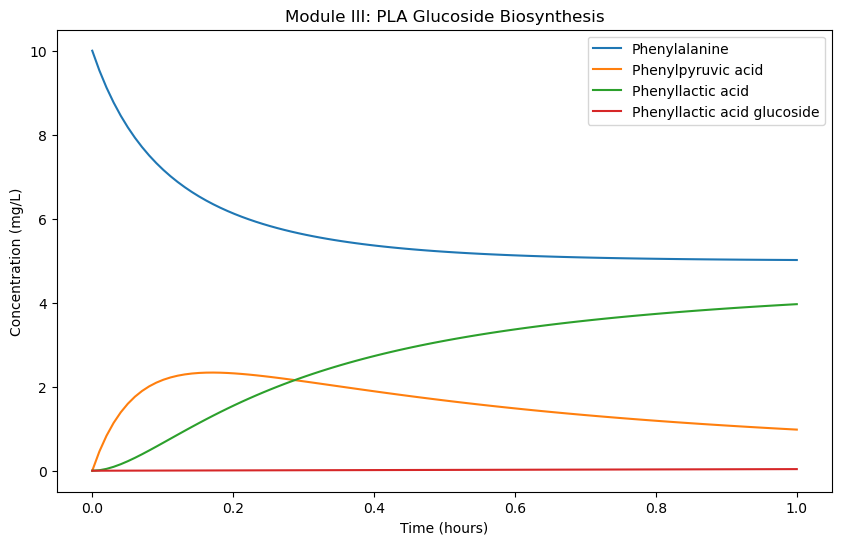

In [13]:
#Module III: PLA glucoside biosynthesis
from biocrnpyler import *

# Define species
Phe = Species("Phenylalanine")
PPA = Species("Phenylpyruvic_acid")
PLA = Species("Phenyllactic_acid")
PLA_glucoside = Species("Phenyllactic_acid_glucoside")

# Enzymes
Aro = Species("Aro_enzyme")  # Aro8/Aro9
WfPPR = Species("WfPPR_enzyme")
AbUGT = Species("AbUGT_enzyme")
Egh1 = Species("Egh1_enzyme")  # Inhibitor of glucosylation

# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 


# Reactions
#Phenylalanine → Phenylpyruvic acid via Aro8 / Aro9
R1 = Reaction.from_massaction([Phe, Aro], [PPA], k_forward =k1)
#Phenylpyruvic acid → Phenyllactic acid (PLA) via WfPPR 
R2 = Reaction.from_massaction([PPA, WfPPR], [PLA], k_forward = k2)
#Phenyllactic acid → Phenyllactic acid glucoside (PLA_glucoside) via AbUGT
R3 = Reaction.from_massaction([PLA, AbUGT], [PLA_glucoside], k_forward = k3)
# PLA glucosylation inhibited by Egh1
hill_neg = HillNegative(k=1.0, s1=Egh1, K=1.0, n=2)
R3 = Reaction([PLA, AbUGT], [PLA_glucoside], propensity_type=hill_neg)



# Build CRN
species = [Phe, PPA, PLA, PLA_glucoside, Aro, WfPPR, AbUGT, Egh1]
reactions = [R1, R2, R3]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("MODULE 3: PLA glucoside biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))
CRN.write_sbml_file("Module_2.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    # Correct initial conditions
    x0 = {
        "Phenylalanine": 10,
        "Phenylpyruvic_acid": 0,
        "Phenyllactic_acid": 0,
        "PLA_glucoside": 0,
        "Aro_enzyme": 5,
        "WfPPR_enzyme": 5,
        "AbUGT_enzyme": 5,
        "Egh1_enzyme": 5
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Phenylalanine"], label="Phenylalanine")
    plt.plot(R['time'], R["Phenylpyruvic_acid"], label="Phenylpyruvic acid")
    plt.plot(R['time'], R["Phenyllactic_acid"], label="Phenyllactic acid")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")
    plt.legend()
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration (mg/L)")
    plt.title("Module III: PLA Glucoside Biosynthesis")
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")
    

Module V: TA scaffold biosynthesis
Species = Tropine, Phenyllactic_acid_glucoside, Littorine, NtJAT1_transporter, AbLS_DsRed_enzyme
Species(N = 5) = {
Tropine (@ 0),  Phenyllactic_acid_glucoside (@ 0),  NtJAT1_transporter (@ 0),  Littorine (@ 0),  AbLS_DsRed_enzyme (@ 0),  
}

Reactions (2) = [
0. Tropine+NtJAT1_transporter --> Tropine
 Kf=k_forward * Tropine * NtJAT1_transporter
  k_forward=1.0

1. Phenyllactic_acid_glucoside+Tropine+AbLS_DsRed_enzyme --> Littorine
 Kf=k_forward * Phenyllactic_acid_glucoside * Tropine * AbLS_DsRed_enzyme
  k_forward=1.0

]


True

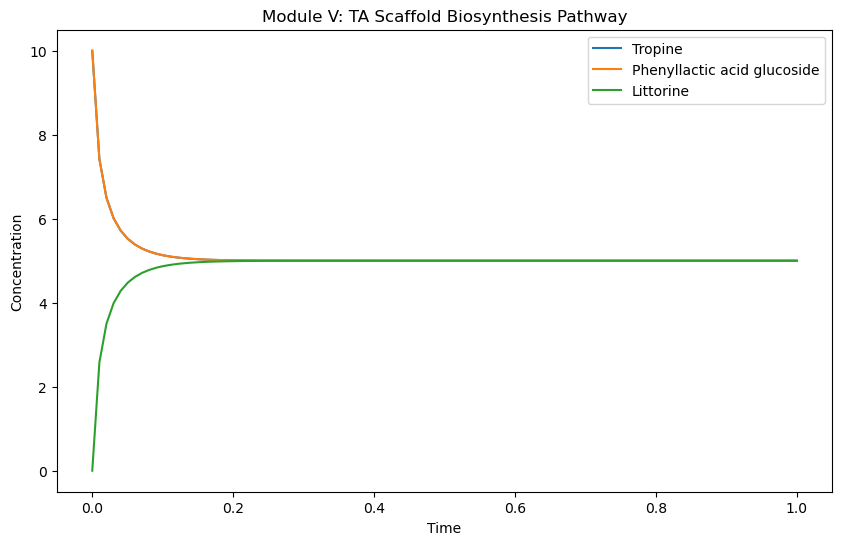

In [78]:
# Module V: TA scaffold biosynthesis

from biocrnpyler import *

# Define species
Tropine = Species("Tropine")                  # Acyl acceptor
PLAG = Species("Phenyllactic_acid_glucoside") # Acyl donor
Littorine = Species("Littorine")              # Product

# Transporter and enzyme
NtJAT1 = Species("NtJAT1_transporter")        # Tropine transporter
AbLS_DsRed = Species("AbLS_DsRed_enzyme")  #enzyme (Littorine synthase)
# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 
# Reactions
# Tropine → Tropine (catalyzed by NtJAT1)
R1 = Reaction.from_massaction([Tropine, NtJAT1], [Tropine], k_forward=k1)
# PLA-glucoside + Tropine → Littorine (catalyzed by AbLS_DsRed)
R2 = Reaction.from_massaction([PLAG, Tropine, AbLS_DsRed], [Littorine], k_forward=k2)
# Assemble CRN
species = [Tropine, PLAG, Littorine, NtJAT1, AbLS_DsRed]
reactions = [R1, R2]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("Module V: TA scaffold biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    # Correct initial conditions
    x0 = {
        "Tropine": 10,
        "Phenyllactic_acid_glucoside": 10,
        "Littorine": 0,
        "NtJAT1_transporter": 5,
        "AbLS_DsRed_enzyme": 5
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Tropine"], label="Tropine")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")
    plt.plot(R['time'], R["Littorine"], label="Littorine")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module V: TA Scaffold Biosynthesis Pathway")
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

# Save the CRN to an SBML file
CRN.write_sbml_file("Module_5.xml")



=== Species and their compartments ===
Littorine in <biocrnpyler.compartments.Compartment object at 0x000002E1DF29ABA0>
Hyoscyamine_aldehyde in <biocrnpyler.compartments.Compartment object at 0x000002E1DF2987A0>
Hyoscyamine in <biocrnpyler.compartments.Compartment object at 0x000002E1DF29ABA0>
Scopolamine in <biocrnpyler.compartments.Compartment object at 0x000002E1DF29ABA0>
AbCYP80F1 in <biocrnpyler.compartments.Compartment object at 0x000002E1DF2987A0>
AtATR1 in <biocrnpyler.compartments.Compartment object at 0x000002E1DF2987A0>
DsHDH in <biocrnpyler.compartments.Compartment object at 0x000002E1DF29ABA0>
DsH6H in <biocrnpyler.compartments.Compartment object at 0x000002E1DF29ABA0>

SBML file 'tropane_pathway_compartments.xml' saved successfully.


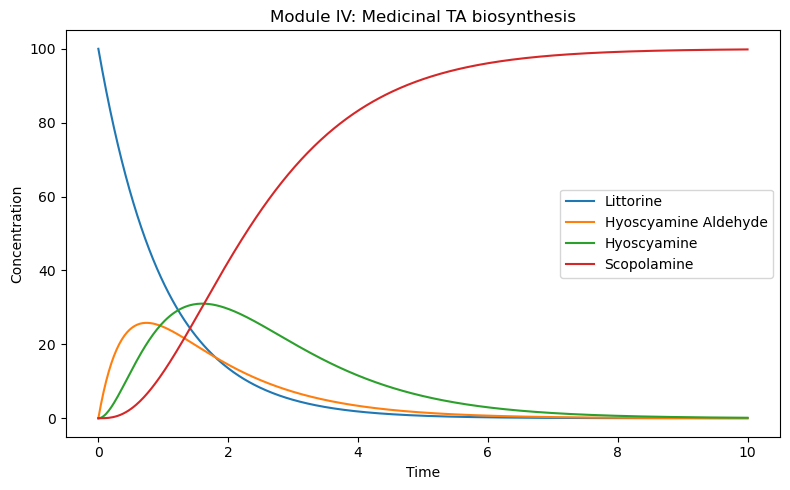

In [33]:
# Module IV: Medicinal TA biosynthesis

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork, Compartment

# === Define compartments ===
cytosol = Compartment("cytosol", spatial_dimensions=3, size=1.0, initial_volume=1.0)
ER = Compartment("ER", spatial_dimensions=3, size=1.0, initial_volume=1.0)

# === Define species in compartments ===
Littorine = Species("Littorine", compartment=cytosol)
Hyoscyamine_aldehyde = Species("Hyoscyamine_aldehyde", compartment=ER)
Hyoscyamine = Species("Hyoscyamine", compartment=cytosol)
Scopolamine = Species("Scopolamine", compartment=cytosol)

# === Enzymes (not catalyzing in code, just included for context) ===
AbCYP80F1 = Species("AbCYP80F1", compartment=ER)
AtATR1 = Species("AtATR1", compartment=ER)
DsHDH = Species("DsHDH", compartment=cytosol)
DsH6H = Species("DsH6H", compartment=cytosol)

# === Define rate constants ===
k1 = 1.0  # Littorine → Hyoscyamine aldehyde
k2 = 1.0  # Hyoscyamine aldehyde → Hyoscyamine
k3 = 1.0  # Hyoscyamine → Scopolamine

# === Define reactions ===
R1 = Reaction.from_massaction([Littorine], [Hyoscyamine_aldehyde], k_forward=k1)
R1.name = "Littorine_to_HyoscyamineAldehyde"

R2 = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=k2)
R2.name = "HyoscyamineAldehyde_to_Hyoscyamine"

R3 = Reaction.from_massaction([Hyoscyamine], [Scopolamine], k_forward=k3)
R3.name = "Hyoscyamine_to_Scopolamine"

# === Simulated transport between compartments ===
Transport = Reaction.from_massaction(
    [Hyoscyamine_aldehyde], [Hyoscyamine],
    k_forward=1.0, k_reverse=0.2
)
Transport.name = "Transport_HA_ER_to_Cytosol"

# === Build CRN ===
CRN = ChemicalReactionNetwork(
    species=[Littorine, Hyoscyamine_aldehyde, Hyoscyamine, Scopolamine,
             AbCYP80F1, AtATR1, DsHDH, DsH6H],
    reactions=[R1, R2, R3, Transport]
)

# === Confirm compartment info ===
print("\n=== Species and their compartments ===")
for s in CRN.species:
    print(f"{s.name} in {s.compartment}")

# === Export SBML ===
CRN.write_sbml_file("tropane_pathway_compartments.xml")
print("\nSBML file 'tropane_pathway_compartments.xml' saved successfully.")

# === Simulate with BioSCRAPE ===
try:
    import bioscrape
    import numpy as np
    import pylab as plt

    # Initial conditions
    x0 = {"Littorine_cytosol": 100}

    # Timepoints
    timepoints = np.linspace(0, 10, 500)

    # Simulate
    results = CRN.simulate_with_bioscrape_via_sbml(
        timepoints=timepoints,
        initial_condition_dict=x0
    )

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(results["time"], results["Littorine_cytosol"], label="Littorine")
    plt.plot(results["time"], results["Hyoscyamine_aldehyde_ER"], label="Hyoscyamine Aldehyde")
    plt.plot(results["time"], results["Hyoscyamine_cytosol"], label="Hyoscyamine")
    plt.plot(results["time"], results["Scopolamine_cytosol"], label="Scopolamine")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module IV: Medicinal TA biosynthesis")
    plt.legend()
    plt.tight_layout()
    plt.show()

except ModuleNotFoundError:
    print("\n'bioscrape' or 'matplotlib' not installed. Use:\n  pip install bioscrape matplotlib")